# Research on apartment sales ads
(exploratory data analysis)

## Content
- [Introduction](#intro)
- [General Information](#genaral)
- [Preprocessing data](#preproces)
- [Add new data](#new)
- [Exploration Analyze](#analyze)
- [Conclusion](#conclusion)

## Introduction<a href='intro'></a>

**Project Description**

You’ll have the data from Yandex.Realty provided for you. Working with data will not always be completely familiar - from time to time, you'll encounter data from peculiar sources, operating with peculiar measurements. Let's work with something exotic to keep you on your toes: a real estate agency has an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to create an automated system that is capable of detecting anomalies and fraud.
There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. This could be calculated, for example, based upon the distance from the downtown area, airport, the nearest park or body of water.

**Data Description**

- airports_nearest: the distance to the nearest airport in meters (m.).
- balcony: the number of balconies.
- ceiling_height: the ceiling height in meters (m.).
- cityCenters_nearest: the distance to the Saint-Petersburg center in meters (m.).
- days_exposition: how many days the ad was displayed (from publication to removal).
- first_day_exposition: the publication date.
- floor: the apartment floor number.
- floors_total: the total number of floors in the building.
- is_apartment: legacy column which doesn't convey any important information (Boolean type). See the note below.
- kitchen_area: the kitchen area in square meters (sq.m.).
- last_price: the price at the time when the ad was removed.
- living_area: the living area in square meters (sq.m.).
- locality_name: the locality name.
- open_plan: an open plan design (Boolean type).
- parks_around3000: the number of parks in a 3 km. radius.
- parks_nearest: the distance to the nearest park in meters (m.).
- ponds_around3000: the number of bodies of water in a 3 km. radius.
- ponds_nearest: the distance to the nearest body of water (m.).
- rooms: the number of bedrooms.
- studio: whether it's a studio or not (Boolean type).
- total_area: the total area in square meters (sq.m.).
- total_images: the number of photos of the apartment in the ad.

*Note*:<br>
The column 'is_apartment' has True values for properties that belong to the Russian real estate entity confusingly called "apartments" - a space that is non-residential in a legal sense and is not considered a part of the housing stock, even though it is often used for temporary rental housing. This column has nothing to do with whether the property in question is an apartment or not - all records in this dataset are apartments.

*Libraries*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


## General Information <a href = 'general'></a>

In [62]:
try:
    real_estate_database = pd.read_csv('real_estate_data.csv', sep = '\t')
except:
    real_estate_database = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [63]:
real_estate_database.info()

In [64]:
real_estate_database.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [65]:
real_estate_database.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [66]:
real_estate_database.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9567,5,3300000.0,36.6,2017-09-11T00:00:00,1,2.50,5.0,15.0,3,NaN,...,12.0,2.0,Санкт-Петербург,47234.0,25796.0,1.0,286.0,1.0,227.0,218.0
20913,18,4500000.0,41.0,2018-08-28T00:00:00,1,NaN,19.0,20.0,12,NaN,...,11.0,NaN,Санкт-Петербург,30440.0,11829.0,1.0,722.0,0.0,NaN,31.0
18679,5,4700000.0,57.2,2017-12-15T00:00:00,3,2.60,9.0,40.4,5,NaN,...,6.1,NaN,Санкт-Петербург,28831.0,13490.0,0.0,NaN,0.0,NaN,187.0
21667,5,950000.0,35.0,2017-09-28T00:00:00,2,NaN,2.0,20.0,1,NaN,...,5.0,0.0,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,18.0
5717,10,3200000.0,31.0,2017-07-18T00:00:00,1,NaN,9.0,15.0,9,NaN,...,8.4,0.0,Санкт-Петербург,42336.0,11963.0,1.0,283.0,0.0,NaN,84.0
8885,1,1938000.0,32.3,2018-08-02T00:00:00,1,NaN,25.0,16.0,13,NaN,...,8.2,NaN,посёлок Парголово,55827.0,21502.0,0.0,NaN,0.0,NaN,25.0
6173,19,6280000.0,42.6,2017-10-31T00:00:00,1,2.92,17.0,NaN,16,NaN,...,NaN,2.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,23.0
17178,9,10348000.0,77.0,2016-06-21T00:00:00,2,2.90,4.0,40.0,2,NaN,...,14.0,0.0,Сестрорецк,52873.0,33972.0,0.0,NaN,1.0,89.0,114.0
17134,20,9400000.0,70.0,2016-12-01T00:00:00,2,3.20,6.0,47.2,4,NaN,...,10.5,1.0,Санкт-Петербург,20383.0,2102.0,3.0,267.0,3.0,262.0,600.0
11687,8,4300000.0,56.8,2017-01-23T00:00:00,2,2.92,3.0,36.0,3,False,...,8.0,0.0,Санкт-Петербург,16870.0,6941.0,1.0,541.0,0.0,NaN,79.0


### Conclusion

We have 22 columns and 23698 entries.

First look at a database showed that we need to change type in these columns:
 - floor_total (float -> int);
 - balcony (float -> int);
 - first_day_exposition (obj -> datetype)
 - days_exposition (float -> int).

Also, we have columns with missing data. One of the reasons why we have it is that not all information in a form on a [website](https://realty.yandex.ru/) are required to be filled and users can miss it by mistake or because they didn't need to fill it.

Let's get more information about data in columns.
(I haven't checked duplicates because in this database we don't have any "primary_key" column)

## Preprocessing Data <a href = "preproces"></a>

Let's check and fix columns with "bugs".

In [67]:
real_estate_database.sort_values('ceiling_height')['ceiling_height'].value_counts().sort_index()

real_estate_database['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

According information from internet ceiling_height in Saint Petersburg is between 2.5 - 5 meters. Data that we got seems very interesting (1 meter, really? lol).
Also, this column has missing data. First we need to convert weired data to normal and then fill NaNs with avg.

In [68]:
real_estate_database.loc[(real_estate_database['ceiling_height'] < 2.5), 'ceiling_height'] = 2.5
real_estate_database.loc[(real_estate_database['ceiling_height'] > 5.0), 'ceiling_height'] = 5.0

In [69]:
real_estate_database.sort_values('ceiling_height')['ceiling_height'].value_counts().sort_index()

real_estate_database['ceiling_height'].describe()

count    14504.000000
mean         2.731755
std          0.293150
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

Ok, now we have data with normal information. Now we can fill missing data with the mean.

In [70]:
ceiling_height_mean = real_estate_database['ceiling_height'].mean()
real_estate_database['ceiling_height'] = real_estate_database['ceiling_height'].fillna(ceiling_height_mean)
real_estate_database['ceiling_height'].round(decimals = 1)

0        2.7
1        2.7
2        2.7
3        2.7
4        3.0
        ... 
23694    3.7
23695    2.7
23696    2.7
23697    3.0
23698    2.5
Name: ceiling_height, Length: 23699, dtype: float64

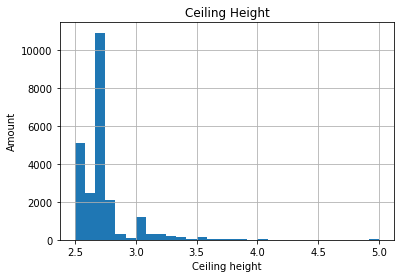

In [71]:
real_estate_database['ceiling_height'].hist(bins = 30)
plt.xlabel('Ceiling height')
plt.ylabel('Amount')
plt.title('Ceiling Height')
plt.show()



#### Conclusion

As, we filled missing data with avg, on a histogram we can see that in most of the apartments ceiling height is 2.7 meters.

I'm not sure if this way is correct but without extra information we can work just with avg of all database. If we know where building is located, when it was build we can 'fix' database with more relevant information.

In [72]:
real_estate_database['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [73]:
real_estate_database['floors_total'] = real_estate_database['floors_total'].fillna(value = 1)

In [74]:
real_estate_database['floors_total'] = real_estate_database['floors_total'].astype(int)

Text(0.5, 1.0, 'Floors')

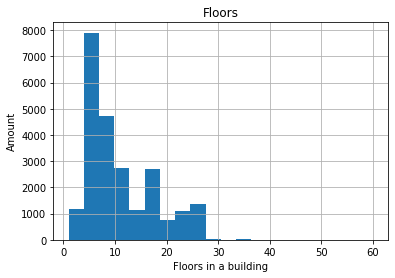

In [75]:
real_estate_database['floors_total'].hist(bins = 20)
plt.xlabel('Floors in a building')
plt.ylabel('Amount')
plt.title('Floors')

#### Conclusion

In the column "total_floors" we needed to convert datatype and fill missing data.
We have just 86 rows with NaNs in this column. It is less than 1%. We can or delete it or fill with amount 1 or median or avg.

In [76]:
real_estate_database['is_apartment'] = real_estate_database['is_apartment'].fillna(value = False)

#### Conclusion

Let's imagine that all missing data it is regular apartments (not lofts) and fill missing data as False

In [77]:
real_estate_database['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [78]:
real_estate_database['balcony'] = real_estate_database['balcony'].fillna(value = 0)

In [79]:
real_estate_database['balcony'] = real_estate_database['balcony'].astype(int)

#### Conclusion

Converted datatype and fill missing data with value = 0.

In [80]:
real_estate_database['locality_name'].sort_values().unique()


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [129]:
def normalize_location_name(value):
    if str(value) == 'nan':
        return

    localities = ['Мурино', 'Кудрово']
    words = value.split(' ')

    if words[0] == 'посёлок':
        words[0] = 'поселок'

    for locality in localities:
        if locality in words:
            return locality

    return ' '.join(words)

real_estate_database['locality_name'] = real_estate_database['locality_name'].apply(normalize_location_name)

In [130]:
real_estate_database['locality_name'].fillna(value = 'Unknown/Other')

0            Санкт-Петербург
1             поселок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

In [132]:
real_estate_database['locality_name'].value_counts()

Санкт-Петербург     15721
Мурино                590
Кудрово               472
поселок Шушары        440
Всеволожск            398
                    ...  
деревня Хапо-Ое         1
село Никольское         1
поселок Рабитицы        1
деревня Кисельня        1
поселок Левашово        1
Name: locality_name, Length: 329, dtype: int64

#### Conclusion

Fill missing data with "unknown/Other". Without address, we can't say where exact area is, plus missing data is less than 1%, no differences how we change it.

In [82]:
real_estate_database['parks_around3000'] = real_estate_database['parks_around3000'].fillna(value = 0)

In [83]:
real_estate_database['ponds_around3000'] = real_estate_database['ponds_around3000'].fillna(value = 0)

#### Conclusion

In columns 'parks_around3000' and 'ponds_around3000' missing data can say that there are no parks or ponds in 3 km.

In [84]:
real_estate_database['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [85]:
real_estate_database.loc[real_estate_database['days_exposition'].isnull(), 'days_exposition'] = real_estate_database['days_exposition'].median()

In [136]:
real_estate_database['days_exposition'] = real_estate_database['days_exposition'].round().astype(int)

In [137]:
real_estate_database['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [138]:
real_estate_database.info()

In [88]:
real_estate_database['first_day_exposition'] = pd.to_datetime(real_estate_database['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

#### Conclusion

Changed datatype from objecttype into datetype in column 'first_day_exposition'.
Fill missing data with avg, which is around 170 days (5.5-6 months). Seems normal.

### Conclusion

I changed data type in four columns and fill missing data in some of them. I haven't fill missing data in such columns as: 'living_area' and 'kitchen_area' because we can't just take avg or median to fill it. Many apartments in Saint Petersburg are very different even if location in the same area.

Also, I left NaNs in columns 'parks_nearest' & 'ponds_nearest' because no information that we can use to fill this data. As with living and kitchen areas we don't know where building is. Plus not clear what does 'nearest' exactly mean, it is more depends on personal opinion.

The same situation with columns 'airports_nearest' & 'cityCenters_nearest'. Without address, it is impossible to find out distance between an apartment and center/airport. In dataset said just 'Saint Petersburg', but what part of it?

If we had information about just street we can fill missing data by avg or median.
Saint Petersburg is a big city and even if people live on the same district information about there apartments and distances can be different.

**Notes**
Check with IT department why we have missing data in columns where data should be gotten automatically.

## Add New Data <a href = "new"></a>

In [89]:
real_estate_database['price_square_meter'] = real_estate_database['last_price'] / real_estate_database['total_area']

In [90]:
real_estate_database['week_day'] = real_estate_database['first_day_exposition'].dt.weekday
real_estate_database['month'] = real_estate_database['first_day_exposition'].dt.month
real_estate_database['year'] = real_estate_database['first_day_exposition'].dt.year
real_estate_database['day'] = real_estate_database['first_day_exposition'].dt.date


In [91]:
def categorize_floor(floor):

    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'

real_estate_database['floor'] = real_estate_database.apply(categorize_floor, axis=1)

In [92]:
real_estate_database['ration_living_total'] = real_estate_database['living_area'] / real_estate_database['total_area']

real_estate_database['ration_living_total']

0        0.472222
1        0.460396
2        0.612500
3             NaN
4        0.320000
           ...   
23694    0.547792
23695    0.644068
23696    0.523810
23697         NaN
23698    0.380805
Name: ration_living_total, Length: 23699, dtype: float64

In [93]:
real_estate_database['ration_kitchen_total'] = real_estate_database['kitchen_area'] / real_estate_database['total_area']

real_estate_database['ration_kitchen_total']


0        0.231481
1        0.272277
2        0.148214
3             NaN
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696         NaN
23697    0.303583
23698    0.278638
Name: ration_kitchen_total, Length: 23699, dtype: float64

In [94]:
real_estate_database.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_day,month,year,day,ration_living_total,ration_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,другой,False,...,2.0,755.0,95.0,120370.370370,3,3,2019,2019-03-07,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.731755,11,18.6,первый,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,2018-12-04,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.731755,5,34.3,другой,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,2015-08-20,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.731755,14,NaN,другой,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,2015-07-24,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,другой,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,2018-06-19,0.320000,0.410000


### Conclusion

Add new columns with new data

## Conduct some research data analysis <a href = "analyze"></a>

In [95]:
real_estate_database['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

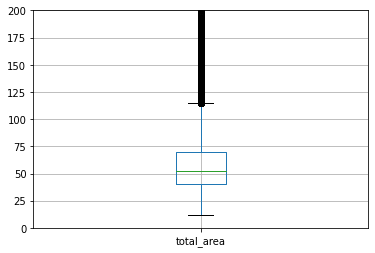

In [96]:
plt.ylim(0, 200)
real_estate_database.boxplot('total_area')
plt.show()

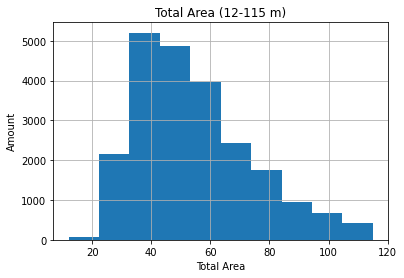

In [97]:
real_estate_database.query('total_area >= 12 and total_area <= 115')['total_area'].hist()
plt.xlabel('Total Area')
plt.ylabel("Amount")
plt.title('Total Area (12-115 m)')
plt.show()

#### Conclusion
According to the graphic we can say that 'total_area' is from 12 meters till +/- 115/120 meters. More than that can be or 'bug' or 'elite property'. 12 meters is also seems strange, but maybe it is room in an apartment (in Saint Petersburg it is still exist). I decided to use in analyze apartments with such data as form 12 till 115 meters. More apartments with total area between 22/25 meters till around 50 meters.

In [98]:
real_estate_database['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

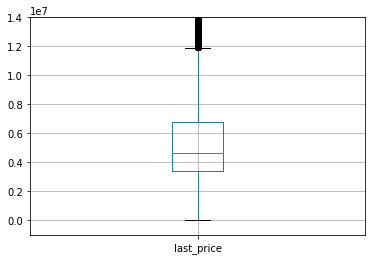

In [99]:
plt.ylim(-1e+06, 1.4e+07)
real_estate_database.boxplot('last_price')
plt.show()

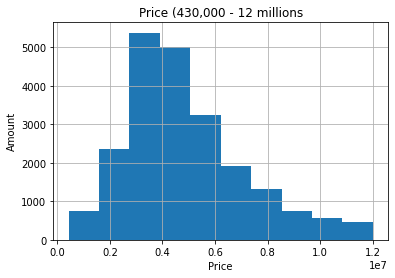

In [100]:
real_estate_database.query('last_price >= 4.3e+5 and last_price <= 1.2e+7')['last_price'].hist()
plt.xlabel('Price')
plt.ylabel('Amount')
plt.title('Price (430,000 - 12 millions')
plt.show()

#### Conclusion
Average price is around 6.5-7 millions. Prices more than 12 millions seems strange, but who knows it is a mistake or greed ;-). Let's take a step between 3.4 thousands till 12 millions.

In [101]:
real_estate_database['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

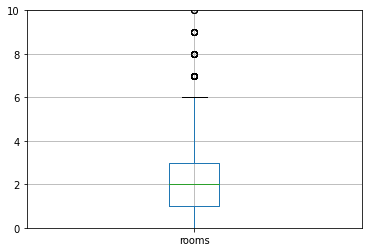

In [102]:
plt.ylim(0, 10)
real_estate_database.boxplot('rooms')
plt.show()

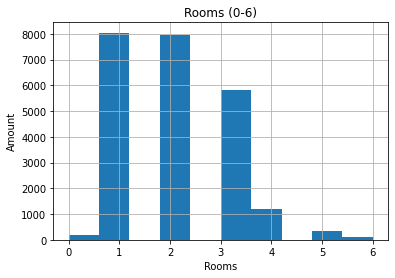

In [103]:
real_estate_database.query('rooms >= 0 and rooms <= 6')['rooms'].hist()
plt.xlabel('Rooms')
plt.ylabel('Amount')
plt.title('Rooms (0-6)')
plt.show()

#### Conclusion
On a graphic we can see that we have apartments with 0 rooms. I don't think that it is a mistake, because apartments-studio people are not associate with one-room flat. I think we need to leave it for our future analyze. 6 rooms seems ok. Let's create a filter with room's amount 0-6.


In [104]:
real_estate_database['ceiling_height'].describe()

count    23699.000000
mean         2.731755
std          0.229331
min          2.500000
25%          2.600000
50%          2.731755
75%          2.731755
max          5.000000
Name: ceiling_height, dtype: float64

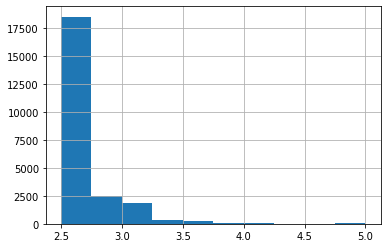

In [105]:
real_estate_database.query('ceiling_height >= 2.5 and ceiling_height <= 5')['ceiling_height'].hist()
plt.show()

Create a filter for ceiling hieght

In [106]:
real_estate_database['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

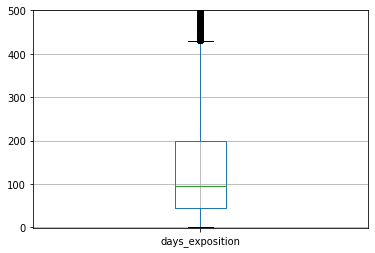

In [107]:
plt.ylim(-1, 500)
real_estate_database.boxplot('days_exposition')
plt.show()


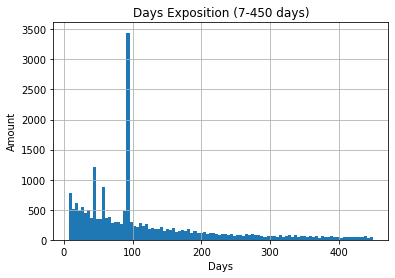

In [108]:
real_estate_database.query('days_exposition >= 7 and days_exposition <= 450')['days_exposition'].hist(bins=100)
plt.xlabel('Days')
plt.ylabel('Amount')
plt.title('Days Exposition (7-450 days)')
plt.show()

#### Conclusion
On graphic minimum day 0 which is impossible, except a situation that owner change his mind. We will not use it. let's take minimum days exposition as one week (also impossible, but...miracles are happend). And maximum - 450.

In [109]:
total_area_new = 'total_area >= 12 and total_area <= 115'
last_price_new = 'last_price >= 4.3e+5 and last_price <= 1.2e+7'
rooms_new = 'rooms >= 0 and rooms <= 6'
ceiling_height_new = 'ceiling_height >= 2.5 and ceiling_height <= 5'
days_exposition_new = 'days_exposition >= 7 and days_exposition <= 450'

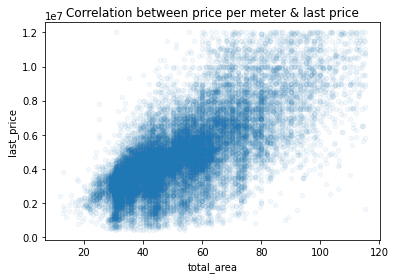

0.6312384710845482

In [110]:
real_estate_database_query = f'{total_area_new} and {last_price_new}'
data = real_estate_database.query(real_estate_database_query)

data.plot(x ='total_area',
          y = 'last_price',
          kind ='scatter',
          alpha = 0.05,
          title = 'Correlation between price per meter & last price'
          )

plt.show()

data['price_square_meter'].corr(data['last_price'])

#### Conclusion
Between price and total area there is a positive correlation (0.6), means that bigger area - bigger price. It is not strong corr, but not weak. In some situations such corr will be able to change if we get new information (new data).

*It is not happening permanent, but had such experience.*

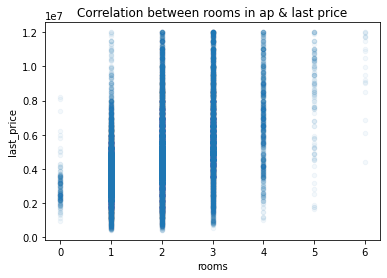

0.4573758337163662

In [111]:
real_estate_database_query = f'{rooms_new} and {last_price_new}'
data = real_estate_database.query(real_estate_database_query)

data.plot(x = 'rooms',
          y = 'last_price',
          kind = 'scatter',
          alpha = 0.05,
          title = 'Correlation between rooms in ap & last price'
          )

plt.show()

data['rooms'].corr(data['last_price'])


#### Conclusion
Correlation between number of rooms and price is weak (0.46). Maybe we have such a result because for buyers more important how many meters' apartment is?!

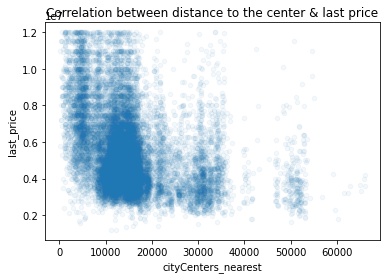

-0.34912208189314625

In [112]:
data = real_estate_database.query(last_price_new)

data.plot(x = 'cityCenters_nearest',
          y = 'last_price',
          kind = 'scatter',
          alpha = 0.05,
          title = 'Correlation between distance to the center & last price'
          )

plt.show()

data['cityCenters_nearest'].corr(data['last_price'])

#### Conclusion
If we speak about a correlation between price and distance to the center of the city, we will have a correlation (far from center cheaper apartment). But corr is weak.


In [113]:
real_estate_database[['floor', 'last_price']].query(last_price_new).pivot_table(index='floor', values='last_price').round(decimals=0)

,last_price
floor,
другой,5072145.0
первый,4160474.0
последний,4533718.0


#### Conclusion
Leaving on the first and last floors are a nightmare, thats why apartments in this categorize cheaper than on other

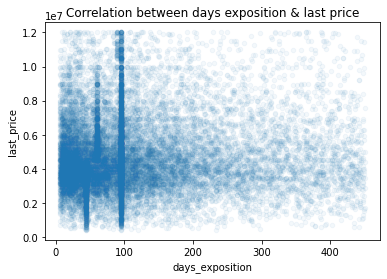

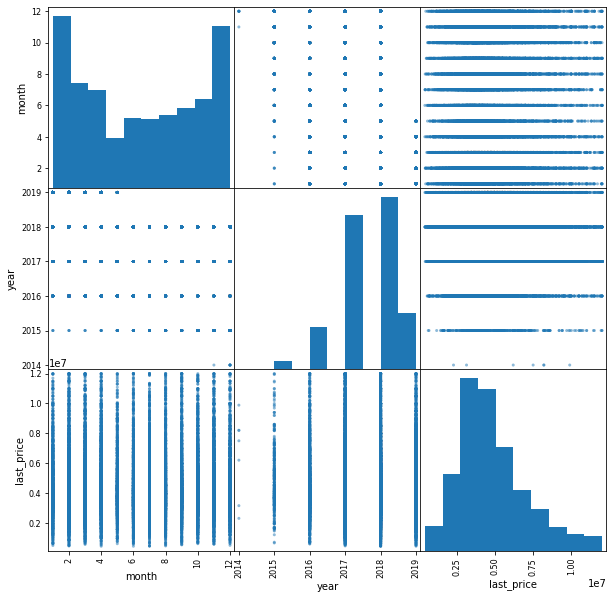

0.032767997253924236

In [114]:
real_estate_database_query = f'{days_exposition_new} and {last_price_new}'
data = real_estate_database.query(real_estate_database_query)


data[['day', 'month', 'year', 'last_price']].corr()
time_corr_stat = real_estate_database.pivot_table(index='last_price', values=['day', 'month', 'year'])

data.plot(x = 'days_exposition',
          y = 'last_price',
          kind = 'scatter',
          alpha = 0.05,
          title = 'Correlation between days exposition & last price'
          )

plt.show()

matrix_corr = pd.plotting.scatter_matrix(data[['day', 'month', 'year', 'last_price']], figsize=(10,10))
plt.show()

data['days_exposition'].corr(data['last_price'])


#### Conclusion
We can say that there is no correlation between when add was post and price.

In [115]:
top10_locations = real_estate_database['locality_name'].value_counts().head(10)
top10_locations

top_names = list(top10_locations.index)

In [116]:
(real_estate_database
    .query(f'locality_name in @top_names and {last_price_new}')
    .pivot_table(index='locality_name', values='price_square_meter')
    .sort_values(by='price_square_meter', ascending=False)
).round(decimals=0)


,price_square_meter
locality_name,
Санкт-Петербург,105629.0
Пушкин,100323.0
деревня Кудрово,92410.0
посёлок Парголово,90176.0
посёлок Мурино,85752.0
посёлок Шушары,78677.0
Колпино,75185.0
Гатчина,68422.0
Всеволожск,67214.0


<AxesSubplot:title={'center':'Price per meter and location'}, xlabel='locality_name'>

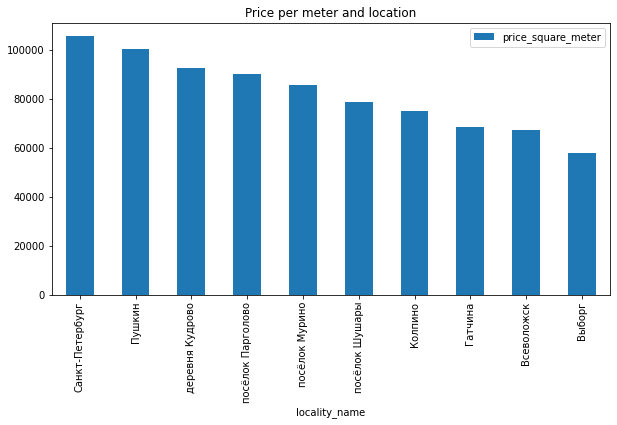

In [117]:
(real_estate_database
    .query(f'locality_name in @top_names and {last_price_new}')
    .pivot_table(index='locality_name', values='price_square_meter')
    .sort_values(by='price_square_meter', ascending=False)
    .plot(y ='price_square_meter',
          kind = 'bar', figsize = (10,5),
          title = 'Price per meter and location')
)

#### Conclusion

According to this barplot we can divide locality into two parts:
- First part includes the most expensive locations such as Saint Petersburg, Pushkin(Пушкин), Kudrovo(деревня Кудрово), Pargolovo(посёлок Парголово) and Murino(посёлок Мурино). Why the most expensive apartments in Saint Peterburg is clear. Other locations are not far from city and fast growing.
- Second part includes less expensive locations such as Shushary(Шушары), Kolpino(Колпино), Gatchina(Гатчина), Vsevolozhsk(Всеволожск), Vyborg(Выборг). These locations are far from city, ex. Vyborg is close to Finland)

Also influences on apartments' price can be direction: North-West or South.

In [118]:
saint_petersburg_city = pd.DataFrame(real_estate_database.loc[real_estate_database['locality_name'] == 'Санкт-Петербург'])

saint_petersburg_city.reset_index()
len(saint_petersburg_city)

15721

In [119]:
saint_petersburg_city['city_center_km'] = (real_estate_database['cityCenters_nearest'] / 1000).round(decimals=0)

In [120]:
spb_prices = saint_petersburg_city.query(last_price_new)
spb_prices.pivot_table(index='city_center_km', values='last_price').head(15)

,last_price
city_center_km,
0.0,8.398000e+06
1.0,8.425899e+06
2.0,8.099481e+06
3.0,7.491159e+06
4.0,7.761206e+06
5.0,7.739940e+06
6.0,7.189997e+06
7.0,6.726621e+06
8.0,6.674020e+06


-0.20674734874298373

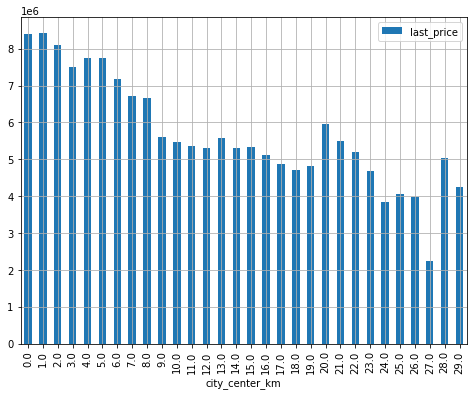

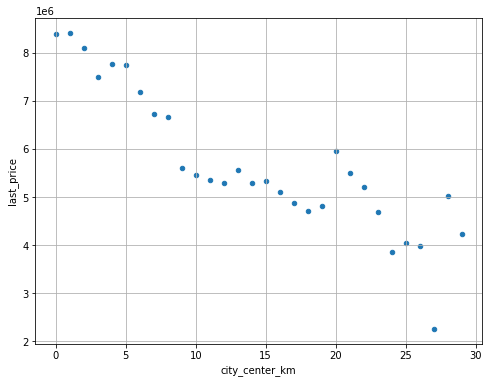

In [122]:
(
pd.DataFrame(spb_prices.pivot_table(index='city_center_km', values='last_price').to_records())
    .plot(x='city_center_km', y='last_price', kind='bar', figsize=(8, 6), grid=True)
)
(
pd.DataFrame(spb_prices.pivot_table(index='city_center_km', values='last_price').to_records())
    .plot(x='city_center_km', y='last_price', kind='scatter', figsize=(8, 6), grid=True)
)

real_estate_database['cityCenters_nearest'].corr(real_estate_database['last_price'])


#### Conclusion
Let's say that center area is from 0 km till 6 or 7 km

In [123]:
ap_in_center = pd.DataFrame(spb_prices.query('city_center_km <= 6'))
len(ap_in_center)

2065

In [124]:
real_estate_database_query = f'{total_area_new} and {rooms_new} and {ceiling_height_new} and {days_exposition_new}'
data = ap_in_center.query(real_estate_database_query)

params = [
    'total_area',
    'rooms',
    'ceiling_height',
    'day',
    'month',
    'year',
    'last_price',
    'city_center_km'
]

data[params].corr().sort_values('last_price')

,total_area,rooms,ceiling_height,month,year,last_price,city_center_km
city_center_km,-0.151392,-0.152433,-0.196471,-0.040617,0.036450,-0.107976,1.000000
month,0.008946,0.026666,0.004289,1.000000,-0.299699,-0.023546,-0.040617
year,-0.064537,-0.035660,0.090319,-0.299699,1.000000,0.057840,0.036450
ceiling_height,0.199036,0.138880,1.000000,0.004289,0.090319,0.143024,-0.196471
rooms,0.786114,1.000000,0.138880,0.026666,-0.035660,0.441066,-0.152433
total_area,1.000000,0.786114,0.199036,0.008946,-0.064537,0.691365,-0.151392
last_price,0.691365,0.441066,0.143024,-0.023546,0.057840,1.000000,-0.107976


<AxesSubplot:title={'center':'price_square_meter'}, xlabel='city_center_km'>

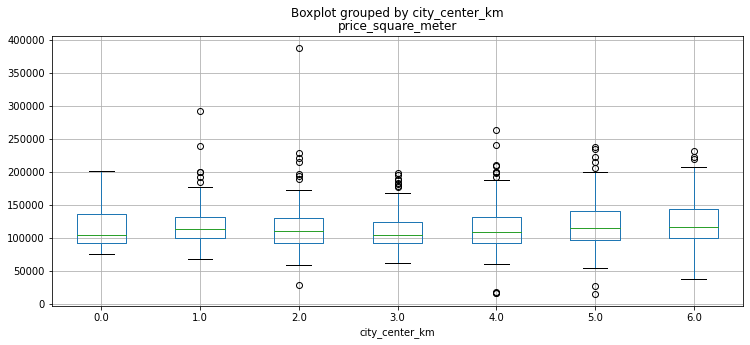

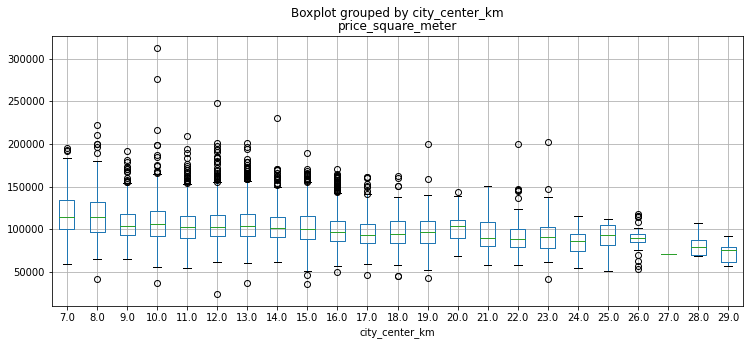

In [125]:
ap_in_center = pd.DataFrame(spb_prices.query('city_center_km <= 6'))
ap_in_center.boxplot('price_square_meter', by='city_center_km',figsize=(12,5))

ap_not_center = pd.DataFrame(spb_prices.query('city_center_km > 6'))
ap_not_center.boxplot('price_square_meter', by='city_center_km',figsize=(12,5))

In [126]:
corr_center = ap_in_center.corr()\
    .sort_values('last_price', ascending=False)\
    .filter(items= ['last_price'])\
    .round(decimals=2)\
    .reset_index()

corr_not_center = ap_not_center.corr()\
    .sort_values('last_price', ascending=False)\
    .filter(items= ['last_price'])\
    .round(decimals=2)\
    .reset_index()

cor_merge = corr_center.merge(corr_not_center, on = 'index')
cor_merge

,index,last_price_x,last_price_y
0,last_price,1.00,1.00
1,total_area,0.68,0.81
2,living_area,0.59,0.65
3,rooms,0.48,0.50
4,kitchen_area,0.40,0.54
5,ceiling_height,0.18,0.25
6,price_square_meter,0.15,0.39
7,days_exposition,0.13,0.05
8,total_images,0.09,0.18
9,floors_total,0.08,0.23


Differences are in correlations but not in features. Probably it is because in center more property is commercial?!


## Conclusion <a href = "conclusion"></a>

Property in center of Saint Petersburg is the most expensive and in some locations which are exclusive property.

As I though the main factors that influence on price are:
- total area
- how many rooms
- living area
- kitchen area

I think this is the main parameter all around the world.

There is no strong correlation between price and:
- distance to the center;
- ceiling height
- number of rooms

In the center property's prices is higher than in other ares, except few locations that have status "elite".

- More apartments with total area between 22/25 meters till around 50 meters,
- More apartments' price between around 3 and 5 millions,
- More apartments on market has 1, 2 or 3  rooms,
- More apartments with average ceiling hieght (around 2.7 meters),
- More apartments were sold in 100 days.

Seems that price can be correlated with if apartment located in North, South etc.
